In [29]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers, regularizers
from keras.datasets import mnist

In [30]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [31]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [32]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer_1 = autoencoder.layers[-3]
decoder_layer_2 = autoencoder.layers[-2]
decoder_layer_3 = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer_3(decoder_layer_2(decoder_layer_1(encoded_input))))

In [33]:
autoencoder.compile(
  optimizer='adam', 
  loss='binary_crossentropy'
)

In [34]:
(X_train, _), (X_test, _) = mnist.load_data()

In [35]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [36]:
history = autoencoder.fit(
  X_train, X_train,
  epochs=50,
  batch_size=256,
  shuffle=True,
  validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3409 - val_loss: 0.1696
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1591 - val_loss: 0.1370
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1351 - val_loss: 0.1247
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1242 - val_loss: 0.1176
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1176 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1129 - val_loss: 0.1102
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1099 - val_loss: 0.1068
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1076 - val_loss: 0.1055
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1060 - val_loss: 0.1035
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1040 - val_loss: 0.1016

In [37]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 784)               1011

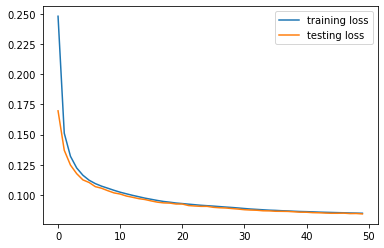

In [38]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="testing loss")
plt.legend();

In [40]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

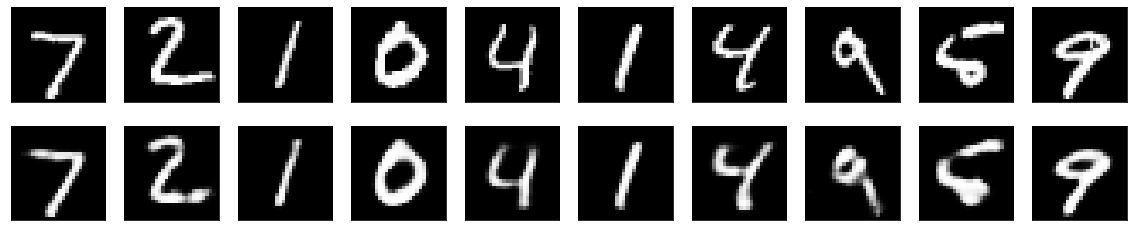

In [41]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
autoencoder.save("model.h5")